In [ ]:
import pandas as pd

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = "C:/Users/Administrator/Desktop/DS_ML_LSTM/JRFO_Table.csv"
data = pd.read_csv(file_path)
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55757 entries, 0 to 55756
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIMESTAMP           55757 non-null  object 
 1   RECORD              55757 non-null  int64  
 2   Batt_volt_Min       55757 non-null  float64
 3   PTemp               55757 non-null  float64
 4   AirTC_Avg           55757 non-null  float64
 5   RH                  55757 non-null  float64
 6   shf                 55757 non-null  float64
 7   Soil_Moisture       55757 non-null  float64
 8   Soil_Temperature_C  55757 non-null  float64
 9   SW_in               55757 non-null  float64
 10  SW_out              55757 non-null  float64
 11  LW_in               55757 non-null  float64
 12  LW_out              55757 non-null  float64
 13  Target_Depth        55757 non-null  float64
 14  Qual                55757 non-null  int64  
 15  TCDT                55757 non-null  float64
 16  DBTC

(             TIMESTAMP  RECORD  Batt_volt_Min  PTemp  AirTC_Avg     RH  \
 0  2022-12-09 15:20:00       0          13.30 -1.644     -2.518  60.07   
 1  2022-12-09 15:30:00       1          13.26 -1.831     -2.668  66.46   
 2  2022-12-09 15:40:00       2          13.24 -2.071     -2.809  63.16   
 3  2022-12-09 15:50:00       3          13.18 -2.316     -3.037  65.16   
 4  2022-12-09 16:00:00       4          13.14 -2.564     -3.208  66.44   
 
         shf  Soil_Moisture  Soil_Temperature_C  SW_in  SW_out  LW_in  LW_out  \
 0 -19.77046          0.075                 2.6    0.0     0.0    0.0     0.0   
 1 -19.82511          0.075                 2.5    0.0     0.0    0.0     0.0   
 2 -19.91182          0.075                 2.5    0.0     0.0    0.0     0.0   
 3 -20.00223          0.075                 2.5    0.0     0.0    0.0     0.0   
 4 -20.09948          0.077                 2.5    0.0     0.0    0.0     0.0   
 
    Target_Depth  Qual   TCDT  DBTCDT  
 0         208.8    

In [ ]:
data = data[data['DBTCDT'] >= 0]

# Save the modified DataFrame back to CSV if needed, or continue processing
data.to_csv('C:/Users/Administrator/Desktop/DS_ML_LSTM/JRFO_Table_NoNeg.csv', index=False)

In [ ]:
file_path1 = "C:/Users/Administrator/Desktop/DS_ML_LSTM/JRFO_Table_NoNeg.csv"
data = pd.read_csv(file_path1)
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53074 entries, 0 to 53073
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIMESTAMP           53074 non-null  object 
 1   RECORD              53074 non-null  int64  
 2   Batt_volt_Min       53074 non-null  float64
 3   PTemp               53074 non-null  float64
 4   AirTC_Avg           53074 non-null  float64
 5   RH                  53074 non-null  float64
 6   shf                 53074 non-null  float64
 7   Soil_Moisture       53074 non-null  float64
 8   Soil_Temperature_C  53074 non-null  float64
 9   SW_in               53074 non-null  float64
 10  SW_out              53074 non-null  float64
 11  LW_in               53074 non-null  float64
 12  LW_out              53074 non-null  float64
 13  Target_Depth        53074 non-null  float64
 14  Qual                53074 non-null  int64  
 15  TCDT                53074 non-null  float64
 16  DBTC

(             TIMESTAMP  RECORD  Batt_volt_Min  PTemp  AirTC_Avg     RH  \
 0  2022-12-09 15:20:00       0          13.30 -1.644     -2.518  60.07   
 1  2022-12-09 15:30:00       1          13.26 -1.831     -2.668  66.46   
 2  2022-12-09 15:40:00       2          13.24 -2.071     -2.809  63.16   
 3  2022-12-09 15:50:00       3          13.18 -2.316     -3.037  65.16   
 4  2022-12-09 16:00:00       4          13.14 -2.564     -3.208  66.44   
 
         shf  Soil_Moisture  Soil_Temperature_C  SW_in  SW_out  LW_in  LW_out  \
 0 -19.77046          0.075                 2.6    0.0     0.0    0.0     0.0   
 1 -19.82511          0.075                 2.5    0.0     0.0    0.0     0.0   
 2 -19.91182          0.075                 2.5    0.0     0.0    0.0     0.0   
 3 -20.00223          0.075                 2.5    0.0     0.0    0.0     0.0   
 4 -20.09948          0.077                 2.5    0.0     0.0    0.0     0.0   
 
    Target_Depth  Qual   TCDT  DBTCDT  
 0         208.8    

In [ ]:
#timestamp as index
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data.set_index('TIMESTAMP', inplace=True)


- EDA analysis and plots

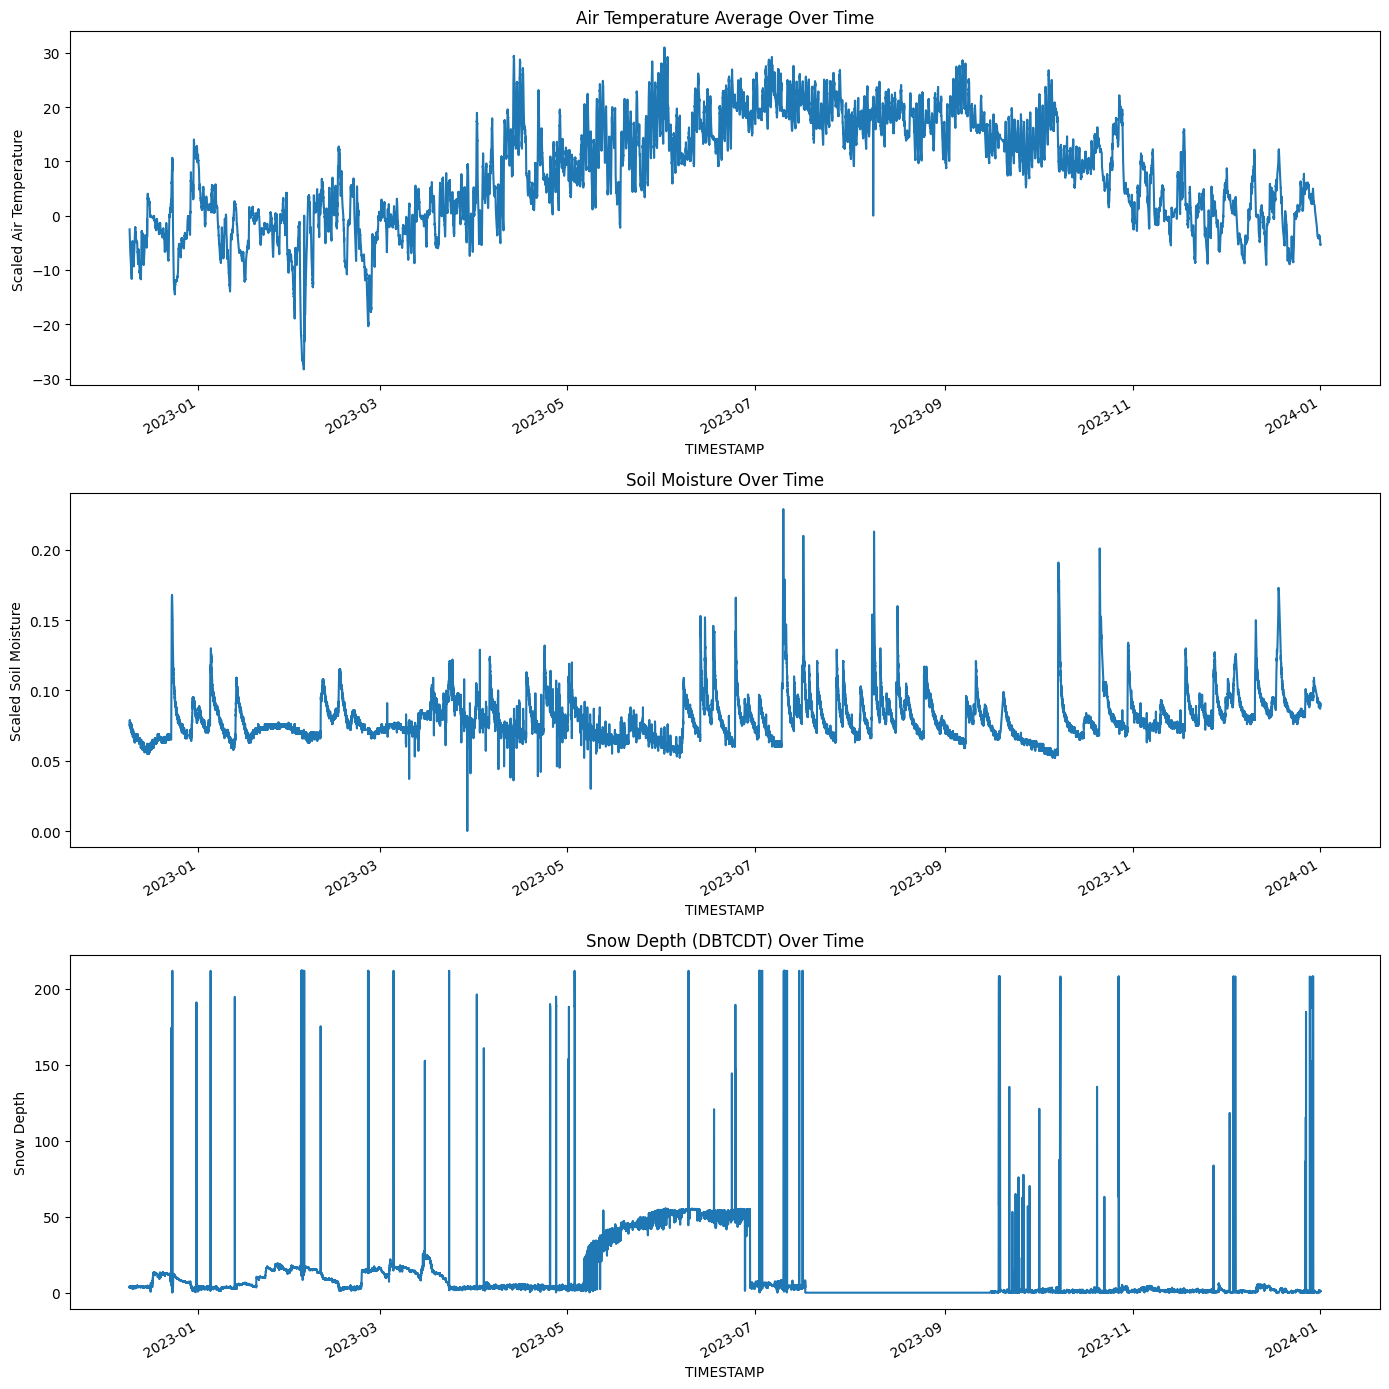

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))

data['AirTC_Avg'].plot(ax=axes[0], title='Air Temperature Average Over Time')
axes[0].set_ylabel('Scaled Air Temperature')

data['Soil_Moisture'].plot(ax=axes[1], title='Soil Moisture Over Time')
axes[1].set_ylabel('Scaled Soil Moisture')4

data['DBTCDT'].plot(ax=axes[2], title='Snow Depth (DBTCDT) Over Time')
axes[2].set_ylabel('Snow Depth')

plt.tight_layout()
plt.show()


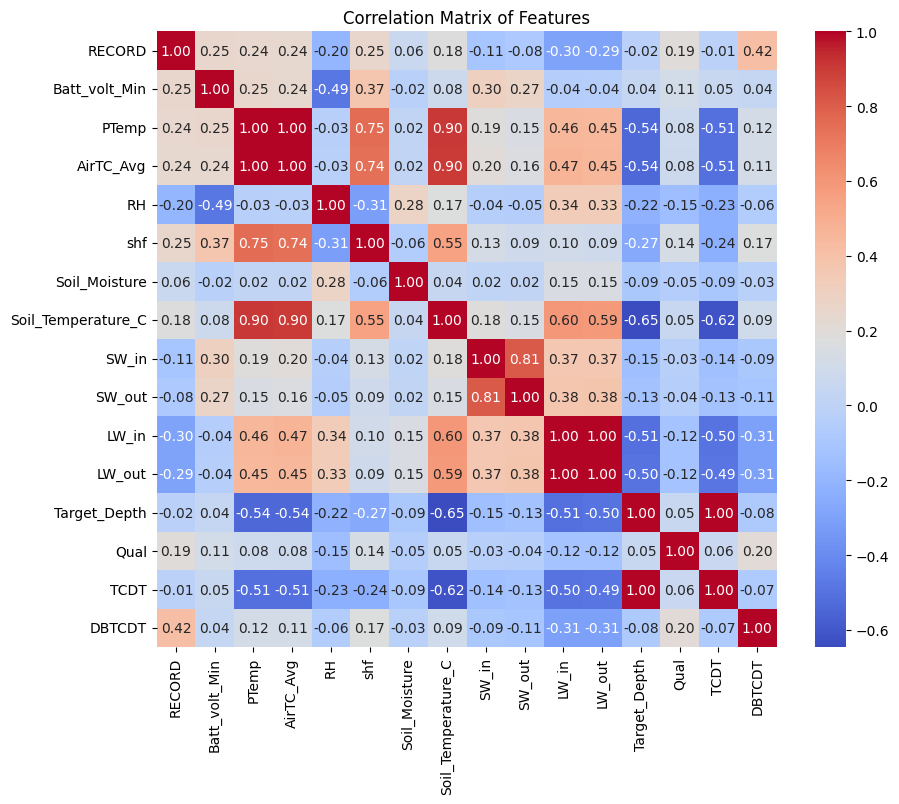

In [ ]:
# Correlation matrix among attributes
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
pip install --upgrade pandas matplotlib seaborn --user

Note: you may need to restart the kernel to use updated packages.


In [ ]:
data.describe()

,RECORD,Batt_volt_Min,PTemp,AirTC_Avg,RH,shf,Soil_Moisture,Soil_Temperature_C,SW_in,SW_out,LW_in,LW_out,Target_Depth,Qual,TCDT,DBTCDT
count,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000
mean,8447.072823,13.010370,7.857147,7.729766,80.486065,-0.232590,0.079470,8.779651,5.441874,1.517027,169.822280,171.438422,162.727056,9.044202,164.248724,12.140697
std,5976.957440,0.437488,10.031399,9.956791,18.710568,12.079712,0.015106,6.782832,16.913504,4.428653,189.754995,190.730106,75.375691,33.653204,75.850134,23.508895
min,0.000000,12.380000,-28.690000,-28.300000,16.330000,-26.457020,0.000000,0.100000,-1.400000,-0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3571.000000,12.790000,-0.077000,-0.213000,69.770000,-7.784505,0.070000,1.300000,0.000000,0.000000,0.000000,0.000000,159.100000,1.000000,163.500000,0.902000
50%,7366.000000,12.880000,7.714000,7.478000,85.300000,-4.721374,0.076000,8.600000,0.000000,0.000000,0.000000,0.000000,201.000000,2.000000,204.400000,3.474000
75%,12290.000000,13.040000,16.750000,16.510000,96.600000,6.341041,0.086000,15.200000,0.010000,0.060000,376.700000,381.200000,205.700000,5.000000,207.400000,13.310000
max,23160.000000,14.970000,31.620000,30.980000,100.000000,90.321990,0.229000,21.100000,697.700000,78.830000,479.900000,469.200000,214.200000,1052.000000,211.800000,211.800000


In [ ]:
# Statistical summary of the dataset
statistical_summary = data.describe()
statistical_summary


,RECORD,Batt_volt_Min,PTemp,AirTC_Avg,RH,shf,Soil_Moisture,Soil_Temperature_C,SW_in,SW_out,LW_in,LW_out,Target_Depth,Qual,TCDT,DBTCDT
count,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000,53074.000000
mean,8447.072823,13.010370,7.857147,7.729766,80.486065,-0.232590,0.079470,8.779651,5.441874,1.517027,169.822280,171.438422,162.727056,9.044202,164.248724,12.140697
std,5976.957440,0.437488,10.031399,9.956791,18.710568,12.079712,0.015106,6.782832,16.913504,4.428653,189.754995,190.730106,75.375691,33.653204,75.850134,23.508895
min,0.000000,12.380000,-28.690000,-28.300000,16.330000,-26.457020,0.000000,0.100000,-1.400000,-0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3571.000000,12.790000,-0.077000,-0.213000,69.770000,-7.784505,0.070000,1.300000,0.000000,0.000000,0.000000,0.000000,159.100000,1.000000,163.500000,0.902000
50%,7366.000000,12.880000,7.714000,7.478000,85.300000,-4.721374,0.076000,8.600000,0.000000,0.000000,0.000000,0.000000,201.000000,2.000000,204.400000,3.474000
75%,12290.000000,13.040000,16.750000,16.510000,96.600000,6.341041,0.086000,15.200000,0.010000,0.060000,376.700000,381.200000,205.700000,5.000000,207.400000,13.310000
max,23160.000000,14.970000,31.620000,30.980000,100.000000,90.321990,0.229000,21.100000,697.700000,78.830000,479.900000,469.200000,214.200000,1052.000000,211.800000,211.800000


In [ ]:
import pandas as pd

# Load the CSV file, specifying the date format directly
data = pd.read_csv(
    'C:/Users/Administrator/Desktop/DS_ML_LSTM/JRFO_Table_NoNeg.csv',
    parse_dates=['TIMESTAMP'],
    date_format='%Y-%m-%d %H:%M:%S'
)

# Check the datatype and first few entries to confirm successful parsing
print(data['TIMESTAMP'].dtype)
print(data.head())


datetime64[ns]
            TIMESTAMP  RECORD  Batt_volt_Min  PTemp  AirTC_Avg     RH  \
0 2022-12-09 15:20:00       0          13.30 -1.644     -2.518  60.07   
1 2022-12-09 15:30:00       1          13.26 -1.831     -2.668  66.46   
2 2022-12-09 15:40:00       2          13.24 -2.071     -2.809  63.16   
3 2022-12-09 15:50:00       3          13.18 -2.316     -3.037  65.16   
4 2022-12-09 16:00:00       4          13.14 -2.564     -3.208  66.44   

        shf  Soil_Moisture  Soil_Temperature_C  SW_in  SW_out  LW_in  LW_out  \
0 -19.77046          0.075                 2.6    0.0     0.0    0.0     0.0   
1 -19.82511          0.075                 2.5    0.0     0.0    0.0     0.0   
2 -19.91182          0.075                 2.5    0.0     0.0    0.0     0.0   
3 -20.00223          0.075                 2.5    0.0     0.0    0.0     0.0   
4 -20.09948          0.077                 2.5    0.0     0.0    0.0     0.0   

   Target_Depth  Qual   TCDT  DBTCDT  
0         208.8     2  207

In [ ]:
import numpy as np

# Extracting time components
data['hour'] = data['TIMESTAMP'].dt.hour
data['day'] = data['TIMESTAMP'].dt.day
data['month'] = data['TIMESTAMP'].dt.month
data['weekday'] = data['TIMESTAMP'].dt.weekday  # Monday=0, Sunday=6
data['year'] = data['TIMESTAMP'].dt.year

# Cyclical encoding for hour and month
data['hour_sin'] = np.sin(data['hour'] * (2. * np.pi / 24))
data['hour_cos'] = np.cos(data['hour'] * (2. * np.pi / 24))
data['month_sin'] = np.sin((data['month'] - 1) * (2. * np.pi / 12))
data['month_cos'] = np.cos((data['month'] - 1) * (2. * np.pi / 12))


In [ ]:
print("Features before normalization:", data.columns)

Features before normalization: Index(['TIMESTAMP', 'RECORD', 'Batt_volt_Min', 'PTemp', 'AirTC_Avg', 'RH',
       'shf', 'Soil_Moisture', 'Soil_Temperature_C', 'SW_in', 'SW_out',
       'LW_in', 'LW_out', 'Target_Depth', 'Qual', 'TCDT', 'DBTCDT', 'hour',
       'day', 'month', 'weekday', 'year', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'],
      dtype='object')


In [ ]:
# List of original features to keep
features = ['AirTC_Avg', 'PTemp', 'RH', 'SW_in', 'SW_out', 'LW_in', 'LW_out', 'Soil_Moisture', 'Soil_Temperature_C', 'DBTCDT']

# Including derived features
derived_features = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos']

# Adding Laplace noise to the 'Target_Depth'
scale = 0.1  # This is an example scale, adjust based on privacy-utility needs
data['Target_Depth_noisy'] = data['Target_Depth'] + np.random.laplace(0, scale, data['Target_Depth'].shape[0])

# Combine all features including the noisy 'Target_Depth'
features_to_use = data[features + derived_features + ['Target_Depth_noisy']]

# Display the dataset with noisy 'Target_Depth'
print(features_to_use.head())

# You can now save or share this data, use it for training, etc.
features_to_use.to_csv('C:/Users/Administrator/Desktop/DS_ML_LSTM/path_to_noisy_data_with_target.csv', index=False)

   AirTC_Avg  PTemp     RH  SW_in  SW_out  LW_in  LW_out  Soil_Moisture  \
0     -2.518 -1.644  60.07    0.0     0.0    0.0     0.0          0.075   
1     -2.668 -1.831  66.46    0.0     0.0    0.0     0.0          0.075   
2     -2.809 -2.071  63.16    0.0     0.0    0.0     0.0          0.075   
3     -3.037 -2.316  65.16    0.0     0.0    0.0     0.0          0.075   
4     -3.208 -2.564  66.44    0.0     0.0    0.0     0.0          0.077   

   Soil_Temperature_C  DBTCDT  hour_sin  hour_cos  month_sin  month_cos  \
0                 2.6   4.011 -0.707107 -0.707107       -0.5   0.866025   
1                 2.5   4.075 -0.707107 -0.707107       -0.5   0.866025   
2                 2.5   4.025 -0.707107 -0.707107       -0.5   0.866025   
3                 2.5   3.953 -0.707107 -0.707107       -0.5   0.866025   
4                 2.5   3.135 -0.866025 -0.500000       -0.5   0.866025   

   Target_Depth_noisy  
0          208.901076  
1          209.076230  
2          208.811290  
3 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_use)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_use.columns)

# Verify normalization
print(scaled_features_df.head())

   AirTC_Avg     PTemp        RH     SW_in    SW_out  LW_in  LW_out  \
0   0.434919  0.448450  0.522768  0.002003  0.009673    0.0     0.0   
1   0.432389  0.445349  0.599139  0.002003  0.009673    0.0     0.0   
2   0.430010  0.441370  0.559699  0.002003  0.009673    0.0     0.0   
3   0.426164  0.437307  0.583602  0.002003  0.009673    0.0     0.0   
4   0.423279  0.433195  0.598900  0.002003  0.009673    0.0     0.0   

   Soil_Moisture  Soil_Temperature_C    DBTCDT  hour_sin  hour_cos  month_sin  \
0       0.327511            0.119048  0.018938  0.146447  0.146447       0.25   
1       0.327511            0.114286  0.019240  0.146447  0.146447       0.25   
2       0.327511            0.114286  0.019004  0.146447  0.146447       0.25   
3       0.327511            0.114286  0.018664  0.146447  0.146447       0.25   
4       0.336245            0.114286  0.014802  0.066987  0.250000       0.25   

   month_cos  Target_Depth_noisy  
0   0.933013            0.974745  
1   0.933013    

In [ ]:
def create_sequences(input_data, target_column, sequence_length):
    X, y = [], []
    for i in range(len(input_data) - sequence_length):
        X.append(input_data.iloc[i:(i + sequence_length)].values)
        # Fix: Access the target column value correctly by position using iloc
        y.append(input_data.iloc[i + sequence_length, target_column])
    return np.array(X), np.array(y)

# Assuming scaled_features_df is your DataFrame and 'DBTCDT' is the name of the column
sequence_length = 144  # Number of time steps you want to look back
target_column_index = scaled_features_df.columns.get_loc('DBTCDT')  # Get the index of the target column using get_loc

X, y = create_sequences(scaled_features_df, target_column_index, sequence_length)

# Output the shapes to confirm
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (52930, 144, 15)
Shape of y: (52930,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes to confirm
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (37051, 144, 15) (37051,)
Test set: (15879, 144, 15) (15879,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(6, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6)              │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535 (2.09 KB)

 Trainable params: 535 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=32, verbose=1)


Epoch 1/3
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 48s 40ms/step - loss: 0.0287 - val_loss: 0.0031
Epoch 2/3
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 58s 50ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 3/3
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - loss: 0.0032 - val_loss: 0.0022


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

497/497 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0024
Test Loss: 0.002217518864199519


In [ ]:
#predictions
predictions = model.predict(X_test)


497/497 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


In [ ]:
# Flatten predictions if they are not in the correct shape
predictions = predictions.flatten()

In [ ]:
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

Shape of predictions: (15879,)
Shape of y_test: (15879,)


In [ ]:
print(predictions[0])

0.010157324


Mean Squared Error: 0.002217520090456214
Mean Absolute Error: 0.01468079015318136


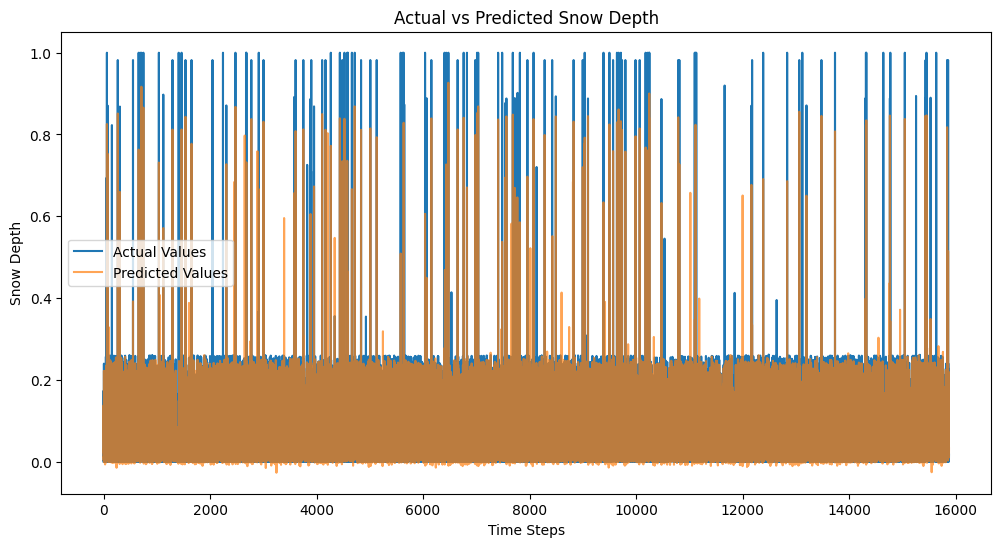

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting actual vs. predicted values for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Snow Depth')
plt.xlabel('Time Steps')
plt.ylabel('Snow Depth')
plt.legend()
plt.show()


In [ ]:
len(predictions)

15879

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions = predictions.flatten()  # Flatten the predictions array if necessary

# Let's take specific indexes to showcase, for example, the first 5 predictions
for i in range(10):
    print(f"Predicted snow depth for sample {i}: {predictions[i]:.2f}, Actual snow depth: {y_test[i]:.2f}")


497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
Predicted snow depth for sample 0: 0.01, Actual snow depth: 0.00
Predicted snow depth for sample 1: 0.00, Actual snow depth: 0.00
Predicted snow depth for sample 2: 0.14, Actual snow depth: 0.17
Predicted snow depth for sample 3: 0.03, Actual snow depth: 0.01
Predicted snow depth for sample 4: 0.02, Actual snow depth: 0.02
Predicted snow depth for sample 5: 0.03, Actual snow depth: 0.03
Predicted snow depth for sample 6: 0.01, Actual snow depth: 0.00
Predicted snow depth for sample 7: 0.22, Actual snow depth: 0.24
Predicted snow depth for sample 8: 0.07, Actual snow depth: 0.07
Predicted snow depth for sample 9: 0.02, Actual snow depth: 0.01


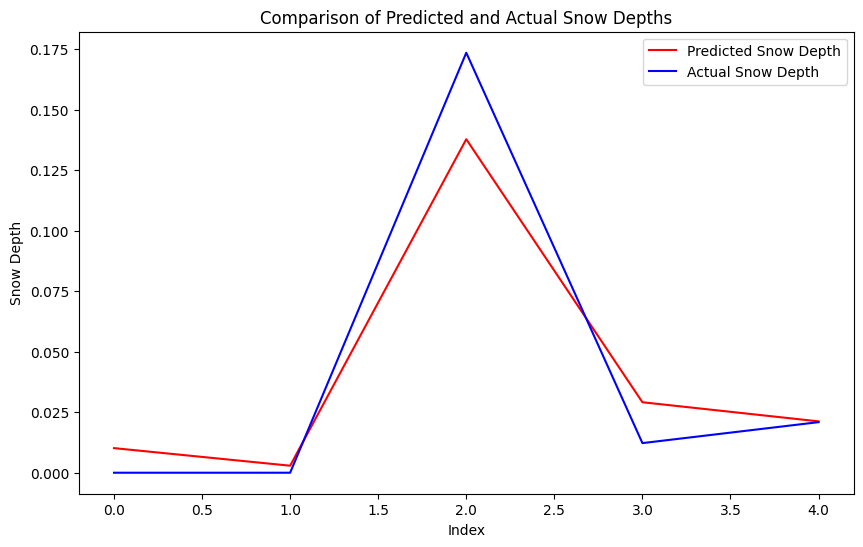

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first 5 predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(predictions[:5], 'r-', label='Predicted Snow Depth')
plt.plot(y_test[:5], 'b-', label='Actual Snow Depth')
plt.xlabel('Index')
plt.ylabel('Snow Depth')
plt.title('Comparison of Predicted and Actual Snow Depths')
plt.legend()
plt.show()


- process
- in data cleaning clear of NAN values and replace with zero
- remove negative values
- added noise to target_depth and added the features of timestamp with other features
- used cyclical time series to convert the timestamp and added features
- performed EDA analysis
- and performed LSTM method and predict the next series and got accurate prediction with good loss
